# Taxi Customer Segmentation and Retention

### <font color='blue'> Keywords: Data Science, Machine Learning, Segmentation, RFM</font>
* By Doston Toshbekov 

<img src="./Images/taxi-title_image.jpg" align="center" width=800 hight=768/>

### 1. Importing libraries 

In [4]:
%autosave 120

Autosaving every 120 seconds


In [6]:
import pandas as pd
from datetime import datetime
import math
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [7]:
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))
    print()
    return

### 2. Data Extracting 

In [9]:
start = datetime.now()

ordersDF = pd.read_csv('./Data/orders.csv', encoding = 'UTF-8', low_memory = False)

print("Computing time takes %s" %(datetime.now()-start))

Computing time takes 0:00:02.368663


In [12]:
ordersDF.drop(["Unnamed: 0"], axis=1, inplace = True)

### 3. Data Exploring 

In [13]:
ordersDF.head()

,order_id,passenger_id,driver_id,date,passenger_take_time,finish_time,requested_time,travel_cost
0,292589508,216171.0,5104.0,2019-01-01 00:01:43,2019-01-01 00:15:04,2019-01-01 00:33:15,2020-10-12 00:09:13,0.003529
1,302332088,48165.0,6282.0,2019-01-01 00:01:54,2019-01-01 00:05:41,2019-01-01 00:22:53,2020-10-12 00:02:19,0.002900
2,224418541,136760.0,4900.0,2019-01-01 00:01:56,2019-01-01 00:11:44,2019-01-01 00:30:32,2020-10-12 00:06:22,0.002843
3,211378159,67348.0,4966.0,2019-01-01 00:02:05,2019-01-01 00:16:39,2019-01-01 00:36:06,2020-10-12 00:11:59,0.002859
4,291238090,152109.0,4990.0,2019-01-01 00:02:41,2019-01-01 00:07:34,2019-01-01 00:26:06,2020-10-12 00:04:33,0.002882


In [14]:
ordersDF.shape 

(967953, 8)

In [15]:
side_by_side(ordersDF.isnull().sum(), ordersDF.count())

order_id                    0    order_id               967953
passenger_id           289419    passenger_id           678534
driver_id              289419    driver_id              678534
date                   289419    date                   678534
passenger_take_time    289419    passenger_take_time    678534
finish_time            289419    finish_time            678534
requested_time         289419    requested_time         678534
travel_cost                 0    travel_cost            967953
dtype: int64                     dtype: int64                 



In [16]:
ordersDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967953 entries, 0 to 967952
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             967953 non-null  int64  
 1   passenger_id         678534 non-null  float64
 2   driver_id            678534 non-null  float64
 3   date                 678534 non-null  object 
 4   passenger_take_time  678534 non-null  object 
 5   finish_time          678534 non-null  object 
 6   requested_time       678534 non-null  object 
 7   travel_cost          967953 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 59.1+ MB


### 4. Data Cleaning 

In [18]:
# Droping rows that contains null 
ordersDF.dropna(inplace=True)

### 5. Data Preprocessing

In [19]:
start = datetime.now()
ordersDF['passenger_id'] = ordersDF['passenger_id'].astype('int')
ordersDF['driver_id'] = ordersDF['driver_id'].astype('int')
ordersDF.shape
print("Computing time takes %s" %(datetime.now()-start))

Computing time takes 0:00:00.029893


In [20]:
start = datetime.now()
ordersDF['date'] = ordersDF['date'].astype('datetime64[ns]')
ordersDF['passenger_take_time'] = ordersDF['passenger_take_time'].astype('datetime64[ns]')
ordersDF['finish_time'] = ordersDF['finish_time'].astype('datetime64[ns]')
ordersDF['requested_time'] = ordersDF['requested_time'].astype('datetime64[ns]')
ordersDF.reset_index(drop=True, inplace=True);
print("Computing time takes %s" %(datetime.now()-start))

Computing time takes 0:00:02.027573


In [21]:
ordersDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678534 entries, 0 to 678533
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             678534 non-null  int64         
 1   passenger_id         678534 non-null  int32         
 2   driver_id            678534 non-null  int32         
 3   date                 678534 non-null  datetime64[ns]
 4   passenger_take_time  678534 non-null  datetime64[ns]
 5   finish_time          678534 non-null  datetime64[ns]
 6   requested_time       678534 non-null  datetime64[ns]
 7   travel_cost          678534 non-null  float64       
dtypes: datetime64[ns](4), float64(1), int32(2), int64(1)
memory usage: 36.2 MB


In [24]:
orderIntervalDF = ordersDF[['passenger_id', 'date', 
                                 'finish_time']].sort_values(by=['passenger_id'])
start = datetime.now()
orderIntervalDF['orderInterval'] = orderIntervalDF.groupby(['passenger_id'])['finish_time'].diff()
print("Computing time takes %s" %(datetime.now()-start))

Computing time takes 0:00:05.460047


In [25]:
side_by_side(ordersDF.isnull().sum(), ordersDF.count())

order_id               0    order_id               678534
passenger_id           0    passenger_id           678534
driver_id              0    driver_id              678534
date                   0    date                   678534
passenger_take_time    0    passenger_take_time    678534
finish_time            0    finish_time            678534
requested_time         0    requested_time         678534
travel_cost            0    travel_cost            678534
dtype: int64                dtype: int64                 



### 6. Data Visualization 

In [26]:
ordersDF.set_index('date',inplace=True)

In [27]:
ordersDF.tail()

,order_id,passenger_id,driver_id,passenger_take_time,finish_time,requested_time,travel_cost
date,,,,,,,
2019-05-31 23:59:27,195494572,77474,8069,2019-06-01 00:05:22,2019-06-01 00:09:51,2020-10-12 00:03:10,0.000865
2019-05-31 23:59:32,242115097,88920,2272,2019-06-01 00:03:04,2019-06-01 00:30:24,2020-10-12 00:02:41,0.001535
2019-05-31 23:59:40,212121169,216276,4729,2019-06-01 00:06:40,2019-06-01 00:23:28,2020-10-12 00:04:04,0.002106
2019-05-31 23:59:46,205487480,49160,5584,2019-06-01 00:05:54,2019-06-01 00:35:20,2020-10-12 00:05:21,0.003172
2019-05-31 23:59:47,311159471,134964,4811,2019-06-01 00:06:28,2019-06-01 00:11:21,2020-10-12 23:59:47,0.000993


In [28]:
ordersDF.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,678534.0,2.566204e+08,6.519020e+07,100026.000000,2.136215e+08,2.549323e+08,3.012138e+08,7.753546e+08
passenger_id,678534.0,1.259987e+05,7.372098e+04,641.000000,6.157200e+04,1.252830e+05,1.892240e+05,2.713740e+05
driver_id,678534.0,4.968057e+03,1.797886e+03,23.000000,4.178000e+03,5.283000e+03,6.380000e+03,8.074000e+03
travel_cost,678534.0,1.879611e-03,4.992158e-03,0.000249,1.163632e-03,1.581653e-03,2.171637e-03,9.002341e-01


### Calculate number of riderships for clients (1st metric)

In [34]:
ridePassengerDF = ordersDF.passenger_id.value_counts()
ridePassengerDF = ridePassengerDF.reset_index()

ridePassengerDF.columns = ['passenger_id', 'ride']

ridePassengerDF.head()

,passenger_id,ride
0,83721,667
1,79155,582
2,90122,575
3,7383,571
4,191423,553


In [35]:
cumSumPassengerDF = ((ridePassengerDF.ride/ridePassengerDF.ride.sum())*100).cumsum()

ridePassengerDF['cumRiders%'] = cumSumPassengerDF.reset_index(drop=True)

In [36]:
ridePassengerDF.head()

,passenger_id,ride,cumRiders%
0,83721,667,0.098300
1,79155,582,0.184073
2,90122,575,0.268815
3,7383,571,0.352967
4,191423,553,0.434466


In [37]:
totalCostbyPassengerDF = ordersDF.groupby('passenger_id')['travel_cost'].sum()

totalCostbyPassengerDF = totalCostbyPassengerDF.reset_index()

In [38]:
passengerDF = pd.merge(ridePassengerDF, totalCostbyPassengerDF , on='passenger_id', how='outer')

In [40]:
passengerDF['cumCost%'] = ((passengerDF['travel_cost']/(passengerDF['travel_cost'].sum())*100)).cumsum()

In [41]:
passengerDF.head()

,passenger_id,ride,cumRiders%,travel_cost,cumCost%
0,83721,667,0.098300,0.846404,0.066365
1,79155,582,0.184073,1.413835,0.177221
2,90122,575,0.268815,1.042600,0.258969
3,7383,571,0.352967,2.590996,0.462124
4,191423,553,0.434466,0.978668,0.538859


### Passanger ridership

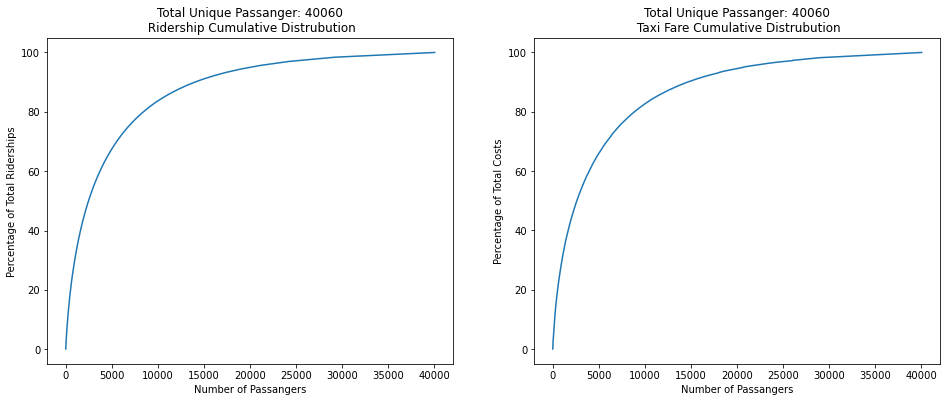

In [42]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16,6))
passengerDF['cumRiders%'].plot(title="Total Unique Passanger: " + 
                                          str(ridePassengerDF.shape[0]) +
                                          "\n Ridership Cumulative Distrubution", ax=ax1)
passengerDF['cumCost%'].plot(title="Total Unique Passanger: " + 
                                          str(ridePassengerDF.shape[0]) +
                                          "\n Taxi Fare Cumulative Distrubution", ax =ax2)
ax1.set(xlabel="Number of Passangers", ylabel="Percentage of Total Riderships")
ax2.set(xlabel="Number of Passangers", ylabel="Percentage of Total Costs")
plt.show();

## Customer Segmentation - RFM Model 

#### Calculating RFM score methodology: 
* Calculating Recency = number of days since last purchase 
* Calculating Frequency = number of purchases during the studied period 
* Calculating Monetary = total amount of purchases made during the studied period 

In [43]:
side_by_side(ordersDF.passenger_take_time.min(), ordersDF.passenger_take_time.max())
TransactionEndingDate = ordersDF.passenger_take_time.max()

Timestamp('2019-01-01 00:05:41')    Timestamp('2019-06-01 00:12:08')



In [44]:
ordersDF.dtypes

order_id                        int64
passenger_id                    int32
driver_id                       int32
passenger_take_time    datetime64[ns]
finish_time            datetime64[ns]
requested_time         datetime64[ns]
travel_cost                   float64
dtype: object

In [111]:
RecencyDF = ordersDF.groupby(['passenger_id'])['passenger_take_time'].max().reset_index()
RecencyDF.columns = ['PassengerID', 'LatestOrderDate']
RecencyDF['Recency'] = ((ordersDF.passenger_take_time.max() - RecencyDF['LatestOrderDate'])/
                        np.timedelta64(1, 'h')).astype(int)
side_by_side(RecencyDF.head(), RecencyDF.Recency.describe())

   PassengerID     LatestOrderDate  Recency    count    40060.000000        
0          641 2019-05-30 16:43:04       31    mean      1083.042287        
1          710 2019-01-11 07:33:56     3376    std       1025.205446        
2          765 2019-05-31 21:42:42        2    min          0.000000        
3          864 2019-05-31 18:29:17        5    25%        202.000000        
4          903 2019-05-21 16:34:46      247    50%        778.000000        
                                               75%       1693.000000        
                                               max       3623.000000        
                                               Name: Recency, dtype: float64



In [112]:
RecencyDF.head(2)

,PassengerID,LatestOrderDate,Recency
0,641,2019-05-30 16:43:04,31
1,710,2019-01-11 07:33:56,3376


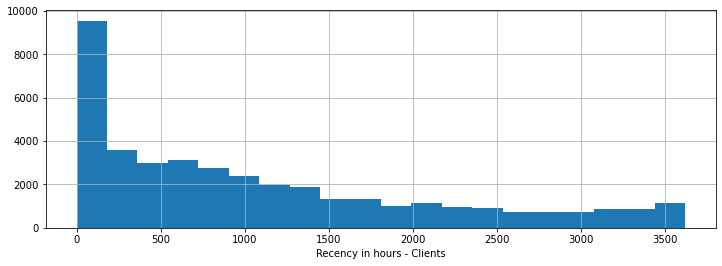

In [113]:
ax = RecencyDF['Recency'].hist(figsize=(12,4), bins=20);
ax.set_xlabel("Recency in hours - Clients")
plt.show()

In [114]:
PassengerFreq = ordersDF[['passenger_id', 'passenger_take_time']].groupby("passenger_id").count().reset_index()
PassengerFreq.columns=['PassengerID', 'Frequency']

In [115]:
PassengerFreq.head(2)

,PassengerID,Frequency
0,641,211
1,710,1


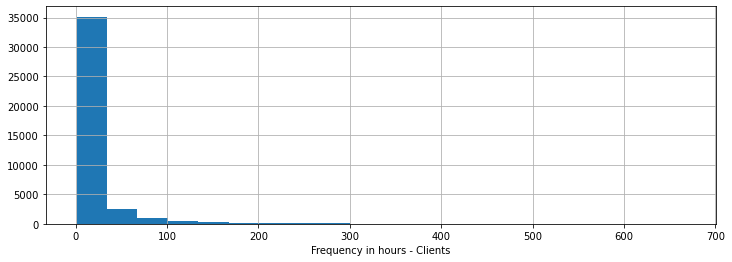

In [116]:
ax = PassengerFreq['Frequency'].hist(figsize=(12,4), bins=20);
ax.set_xlabel("Frequency in hours - Clients")
plt.show()

In [117]:
MonetaryStatisticsDF = ordersDF.groupby('passenger_id')['travel_cost'].aggregate([np.sum, np.mean, np.min, np.max])
MonetaryStatisticsDF = MonetaryStatisticsDF.reset_index()
MonetaryStatisticsDF.columns = ['PassengerID', 'Monetary', 'MeanSpending', 'MinSpending','MaxSpending']
print ('Total Taxi Fare within The Given Transactions Time Period: SOM = {:,.2f}'.
       format(ordersDF['travel_cost'].sum()))

Total Taxi Fare within The Given Transactions Time Period: SOM = 1,275.38


In [118]:
MonetaryStatisticsDF.head()

,PassengerID,Monetary,MeanSpending,MinSpending,MaxSpending
0,641,0.350676,0.001662,0.000391,0.004642
1,710,0.002142,0.002142,0.002142,0.002142
2,765,0.795949,0.001960,0.000508,0.013809
3,864,0.089271,0.001332,0.000615,0.004574
4,903,0.003093,0.001546,0.001507,0.001586


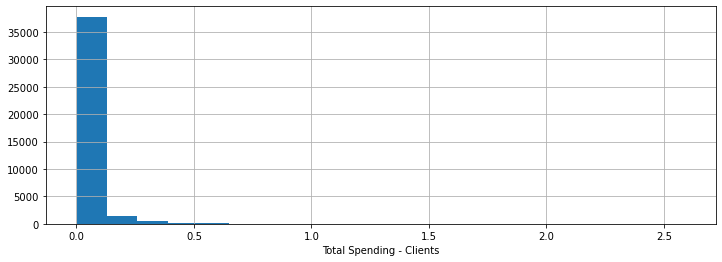

In [119]:
ax = MonetaryStatisticsDF['Monetary'].hist(figsize=(12,4), bins=20);
ax.set_xlabel("Total Spending - Clients")
plt.show()

In [120]:
passengerRFMsDF = pd.merge(RecencyDF, PassengerFreq, on='PassengerID', how='outer') 
passengerRFMsDF = pd.merge(passengerRFMsDF, PassengerFreq, on='PassengerID', how='outer')
passengerRFMsDF = pd.merge(passengerRFMsDF, MonetaryStatisticsDF, on='PassengerID', how='outer')
del RecencyDF, MonetaryStatisticsDF, PassengerFreq

,PassengerID,Recency,Frequency_x,Frequency_y,Monetary,MeanSpending,MinSpending,MaxSpending
count,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000
mean,152897.522391,1083.042287,16.937943,16.937943,0.031837,0.001988,0.001339,0.003683
std,79121.826012,1025.205446,38.499897,38.499897,0.077475,0.002891,0.000946,0.020065
min,641.000000,0.000000,1.000000,1.000000,0.000251,0.000251,0.000249,0.000251
25%,84679.500000,202.000000,1.000000,1.000000,0.002587,0.001382,0.000743,0.001777
50%,160445.000000,778.000000,4.000000,4.000000,0.007338,0.001756,0.001082,0.002550
75%,227090.250000,1693.000000,14.000000,14.000000,0.026166,0.002260,0.001626,0.003755
max,271374.000000,3623.000000,667.000000,667.000000,2.590996,0.450664,0.017327,0.900234


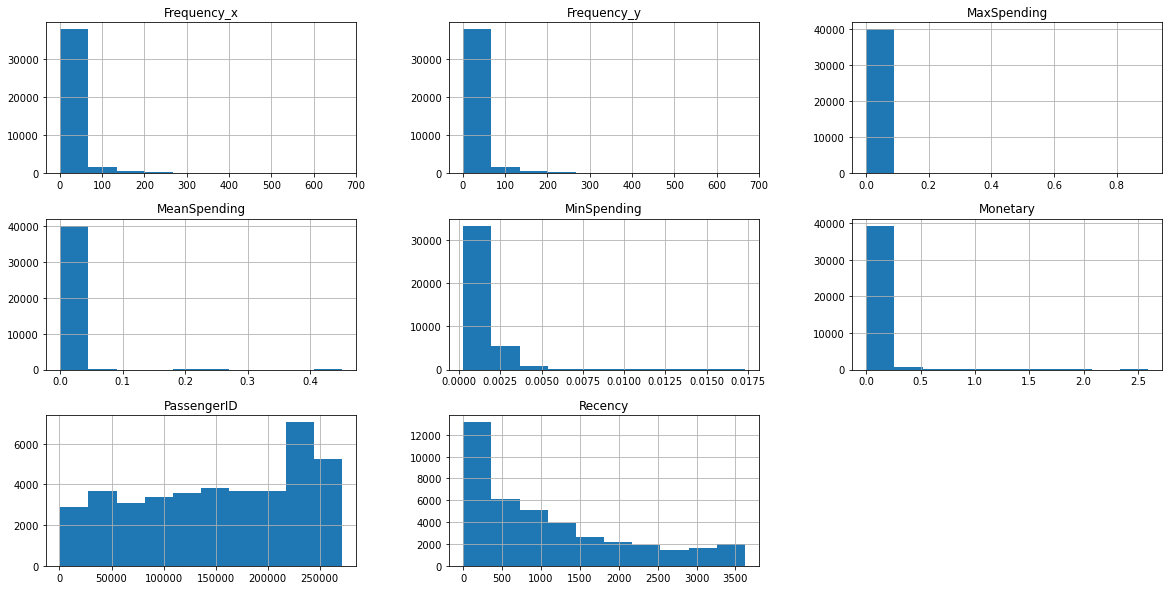

In [121]:
passengerRFMsDF.hist(figsize=(20,10));passengerRFMsDF.describe()

In [122]:
passengerRFM = passengerRFMsDF 

### Correlation RFM

In [123]:
passengerRFM.drop(["LatestOrderDate", "Frequency_y", "MeanSpending", "MinSpending", "MaxSpending"], axis=1, inplace=True) 

In [124]:
passengerRFM.head()

,PassengerID,Recency,Frequency_x,Monetary
0,641,31,211,0.350676
1,710,3376,1,0.002142
2,765,2,406,0.795949
3,864,5,67,0.089271
4,903,247,2,0.003093


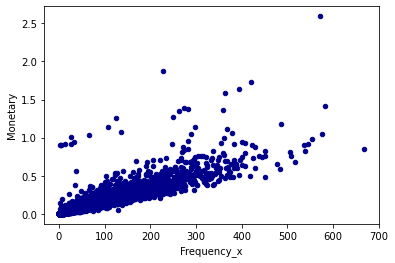

In [125]:
ax = passengerRFM.plot.scatter(x='Frequency_x', y='Monetary', c = 'DarkBlue')
ax

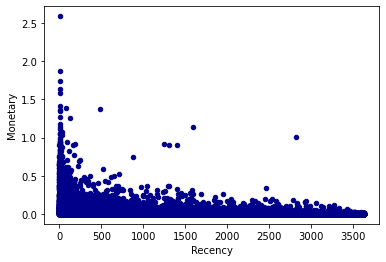

In [142]:
ax = passengerRFM.plot.scatter(x='Recency', y='Monetary', c = 'DarkBlue')
ax

In [126]:
passengerRFM.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerID,40060.0,152897.522391,79121.826012,641.000000,84679.500000,160445.000000,227090.250000,271374.000000
Recency,40060.0,1083.042287,1025.205446,0.000000,202.000000,778.000000,1693.000000,3623.000000
Frequency_x,40060.0,16.937943,38.499897,1.000000,1.000000,4.000000,14.000000,667.000000
Monetary,40060.0,0.031837,0.077475,0.000251,0.002587,0.007338,0.026166,2.590996


In [127]:
passengerRFM.count()

PassengerID    40060
Recency        40060
Frequency_x    40060
Monetary       40060
dtype: int64

## Grading Customers

* Champions [R (4 – 5), F (4 – 5)]
* Loyal Customers [R (3 – 4), F (4 – 5)]
* Potential Loyalists [R (4 – 5), F (2 – 3)]
* Promising [R (3 – 4), F (0 – 1)]
* Can’t Lose Them [R (1 – 2), F (4 – 5)]
* At Risk [R (1 – 2), F (3 – 4)]
* About to Sleep [R (2 – 3), F (1-2)]
* Hibernating [R (1 – 2), F (1 – 2)]
* New Customers R [(4 – 5), F (0 – 1)]
* Need Attention R [(2 – 3), F (2 – 3)]

https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac

## Recency 

* 5 Star - 0 ~ 133
* 4 Star - 133 ~ 533
* 3 Star - 533 ~ 1057
* 2 Star - 1057 ~ 2000
* 1 Star - 2001 ~ 3623  

# Add Grade to customers

In [132]:
passengerRFM['Recency_Grade'] = 0 

In [133]:
# Adding grade to Recency 
counter = 0
while counter < len(passengerRFM):
    if passengerRFM['Recency'].iloc[counter] >= 0 and passengerRFM['Recency'].iloc[counter] < 133:
        passengerRFM.loc[counter, 'Recency_Grade'] = 5 
    elif passengerRFM['Recency'].iloc[counter] >= 133 and passengerRFM['Recency'].iloc[counter] < 533:
        passengerRFM.loc[counter, 'Recency_Grade'] = 4
    elif passengerRFM['Recency'].iloc[counter] >= 533 and passengerRFM['Recency'].iloc[counter] < 1057:
        passengerRFM.loc[counter, 'Recency_Grade'] = 3
    elif passengerRFM['Recency'].iloc[counter] >= 1057 and passengerRFM['Recency'].iloc[counter] < 2001:
        passengerRFM.loc[counter, 'Recency_Grade'] = 2
    elif passengerRFM['Recency'].iloc[counter] >= 2001: 
        passengerRFM.loc[counter, 'Recency_Grade'] = 1 
    else: 
        print ("Error")
    counter = counter + 1 

## Frequency

* 5 Star - 1 
* 4 Star - 2 
* 3 Star - 2 ~ 6 
* 2 Star - 6 ~ 19 
* 1 Star - 19 ~ 667

In [134]:
passengerRFM['Frequency_Grade'] = 0

In [135]:
# Adding grade to Frequency 

counter = 0

while counter < len(passengerRFM):
    if passengerRFM['Frequency_x'].iloc[counter] > 19: 
        passengerRFM.loc[counter, 'Frequency_Grade'] = 1
    elif passengerRFM['Frequency_x'].iloc[counter] > 6 and passengerRFM['Frequency_x'].iloc[counter] <= 19: 
        passengerRFM.loc[counter, 'Frequency_Grade'] = 2
    elif passengerRFM['Frequency_x'].iloc[counter] > 2 and passengerRFM['Frequency_x'].iloc[counter] <= 6: 
        passengerRFM.loc[counter, 'Frequency_Grade'] = 3
    elif passengerRFM['Frequency_x'].iloc[counter] == 2:
        passengerRFM.loc[counter, 'Frequency_Grade'] = 4 
    elif passengerRFM['Frequency_x'].iloc[counter] == 1:
        passengerRFM.loc[counter, 'Frequency_Grade'] = 5 
    else: 
        print ("Error")
    
    counter = counter + 1 


In [136]:
passengerRFM.head(5)

,PassengerID,Recency,Frequency_x,Monetary,Recency_Grade,Frequency_Grade
0,641,31,211,0.350676,5,1
1,710,3376,1,0.002142,1,5
2,765,2,406,0.795949,5,1
3,864,5,67,0.089271,5,1
4,903,247,2,0.003093,4,4


# Final Customer Segmentation

* Champions [R (4 – 5), F (4 – 5)]
* Loyal Customers [R (3 – 4), F (4 – 5)]
* Potential Loyalists [R (4 – 5), F (2 – 3)]
* Promising [R (3 – 4), F (0 – 1)]
* Can’t Lose Them [R (1 – 2), F (4 – 5)]
* At Risk [R (1 – 2), F (3 – 4)]
* About to Sleep [R (2 – 3), F (1-2)]
* Hibernating [R (1 – 2), F (1 – 2)]
* New Customers R [(4 – 5), F (0 – 1)]

* Need Attention R [(2 – 3), F (2 – 3)]

In [137]:
passengerRFM.head(3)

,PassengerID,Recency,Frequency_x,Monetary,Recency_Grade,Frequency_Grade
0,641,31,211,0.350676,5,1
1,710,3376,1,0.002142,1,5
2,765,2,406,0.795949,5,1


In [139]:
# Categories 
chapions = 0 
loyalCustomers = 0 
PotentialLoyalists = 0 
Promising = 0 
cannotLoseThem = 0 
atRisk = 0 
aboutToSleep = 0 
hibernating = 0 
newCustomers = 0 
needAttention = 0 

counter = 0
c = 0 
while counter < len(passengerRFM): 
    if (passengerRFM['Recency_Grade'].iloc[counter] == 4 or passengerRFM['Recency_Grade'].iloc[counter] == 5) and (passengerRFM['Frequency_Grade'].iloc[counter] == 4 or passengerRFM['Frequency_Grade'].iloc[counter] == 5) : 
        chapions = chapions + 1 
    elif (passengerRFM['Recency_Grade'].iloc[counter] == 3 or passengerRFM['Recency_Grade'].iloc[counter] == 4) and (passengerRFM['Frequency_Grade'].iloc[counter] == 4 or passengerRFM['Frequency_Grade'].iloc[counter] == 5) :
        loyalCustomers = loyalCustomers + 1 
    elif (passengerRFM['Recency_Grade'].iloc[counter] == 4 or passengerRFM['Recency_Grade'].iloc[counter] == 5) and (passengerRFM['Frequency_Grade'].iloc[counter] == 2 or passengerRFM['Frequency_Grade'].iloc[counter] == 3) :
        PotentialLoyalists = PotentialLoyalists + 1 
    elif (passengerRFM['Recency_Grade'].iloc[counter] == 3 or passengerRFM['Recency_Grade'].iloc[counter] == 4) and (passengerRFM['Frequency_Grade'].iloc[counter] == 1) :
        Promising = Promising + 1
    elif (passengerRFM['Recency_Grade'].iloc[counter] == 1 or passengerRFM['Recency_Grade'].iloc[counter] == 2) and (passengerRFM['Frequency_Grade'].iloc[counter] == 4 or passengerRFM['Frequency_Grade'].iloc[counter] == 5) :
        cannotLoseThem = cannotLoseThem + 1
    elif (passengerRFM['Recency_Grade'].iloc[counter] == 1 or passengerRFM['Recency_Grade'].iloc[counter] == 2) and (passengerRFM['Frequency_Grade'].iloc[counter] == 3 or passengerRFM['Frequency_Grade'].iloc[counter] == 4) :
        atRisk = atRisk + 1
    elif (passengerRFM['Recency_Grade'].iloc[counter] == 2 or passengerRFM['Recency_Grade'].iloc[counter] == 3) and (passengerRFM['Frequency_Grade'].iloc[counter] == 1 or passengerRFM['Frequency_Grade'].iloc[counter] == 2) :
        aboutToSleep = aboutToSleep + 1
    elif (passengerRFM['Recency_Grade'].iloc[counter] == 1 or passengerRFM['Recency_Grade'].iloc[counter] == 2) and (passengerRFM['Frequency_Grade'].iloc[counter] == 1 or passengerRFM['Frequency_Grade'].iloc[counter] == 2) :
        hibernating = hibernating + 1
    elif (passengerRFM['Recency_Grade'].iloc[counter] == 4 or passengerRFM['Recency_Grade'].iloc[counter] == 5) and (passengerRFM['Frequency_Grade'].iloc[counter] == 1) :
        newCustomers = newCustomers + 1
    elif (passengerRFM['Recency_Grade'].iloc[counter] == 2 or passengerRFM['Recency_Grade'].iloc[counter] == 3) and (passengerRFM['Frequency_Grade'].iloc[counter] == 2 or passengerRFM['Frequency_Grade'].iloc[counter] == 3) :
        needAttention = needAttention + 1
    counter = counter + 1 

print ("Champions: ", chapions ," - ",  round((chapions/40060)*100, 2) , "%")
print ("Loyal Customers: ", loyalCustomers ," - ",  round((loyalCustomers/40060)*100, 2) , "%")
print ("Potential Loyalists: ", PotentialLoyalists ," - ",  round((PotentialLoyalists/40060)*100, 2) , "%")
print ("Promising: ", Promising ," - ",  round((Promising/40060)*100, 2) , "%")
print ("Cannot Lose Them: ", cannotLoseThem ," - ",  round((cannotLoseThem/40060)*100, 2) , "%")
print ("At Risk: ", atRisk ," - ",  round((atRisk/40060)*100, 2) , "%")
print ("About To Sleep: ", aboutToSleep ," - ",  round((aboutToSleep/40060)*100, 2) , "%")
print ("Hibernating: ", hibernating ," - ",  round((hibernating/40060)*100, 2) , "%")
print ("New Customers: ", newCustomers ," - ",  round((newCustomers/40060)*100, 2) , "%")
print ("Need Attention: ", needAttention ," - ",  round((needAttention/40060)*100, 2) , "%")

Champions:  2688  -  6.71 %
Loyal Customers:  3214  -  8.02 %
Potential Loyalists:  6776  -  16.91 %
Promising:  2728  -  6.81 %
Cannot Lose Them:  10174  -  25.4 %
At Risk:  3534  -  8.82 %
About To Sleep:  3403  -  8.49 %
Hibernating:  796  -  1.99 %
New Customers:  4582  -  11.44 %
Need Attention:  2165  -  5.4 %


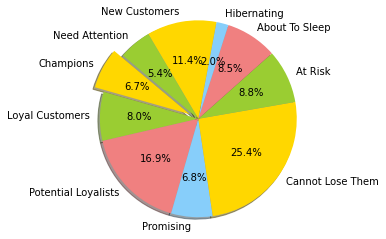

In [156]:
# Data to plotNeed Attention
labels = 'Champions', 'Loyal Customers', 'Potential Loyalists', 'Promising', 'Cannot Lose Them', 'At Risk', 'About To Sleep', 'Hibernating', 'New Customers', 'Need Attention'
sizes = [2688, 3214, 6776, 2728, 10174, 3534, 3403, 796, 4582, 2165]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

<img src="./Images/segmentation.png" align="center" width=800 hight=768/>